In [105]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [55]:
df_train = pd.read_csv('../data/training_data.csv')
df_test = pd.read_csv('../data/testing_data.csv')
df_train.head()

,Unnamed: 0,state,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,UT,VA,VT,WA,WI,WV,WY,International Plan,Voicemail Plan,churn
0,228,VA,104,23,280.2,136,47.63,220.5,92,18.74,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,367,MD,45,0,78.2,127,13.29,253.4,108,21.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,872,OK,149,43,206.7,79,35.14,174.6,122,14.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
3,1266,IA,42,0,155.4,127,26.42,164.1,45,13.95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,277,SD,144,48,189.8,96,32.27,123.4,67,10.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True


In [47]:
X.columns

Index(['Unnamed: 0', 'state', 'account length', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'average_hourly_night_rate',
       'average_hourly_day_rate', 'average_hourly_intl_rate',
       'average_hourly_eve_rate', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC',
       'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'International Plan',
       'Voicemail Plan'],
      dtype='object')

In [62]:
X_train = df_train.drop(['Unnamed: 0','state','churn'], axis=1)
y_train = df_train['churn']
X_test = df_test.drop(['Unnamed: 0','state','churn'], axis=1)
y_test = df_test['churn']

In [57]:
y_train.value_counts()

False    2116
True      368
Name: churn, dtype: int64

## Dummy Model

In [70]:
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)
np.mean(cross_val_score(estimator=dummy, X=X_train, y=y_train, cv=5))


0.8518522424871812

In [59]:
y_pred = dummy.predict(X_train)
y_pred

array([False, False, False, ..., False, False, False])

In [60]:
acc = accuracy_score(y_train, y_pred)
prec = precision_score(y_train, y_pred)
rec = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f'accuracy score is {acc}')
print(f'precision score is {prec}')
print(f'recall score is {rec}')
print(f'F1 score is {f1}')

accuracy score is 0.8518518518518519
precision score is 0.0
recall score is 0.0
F1 score is 0.0


C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


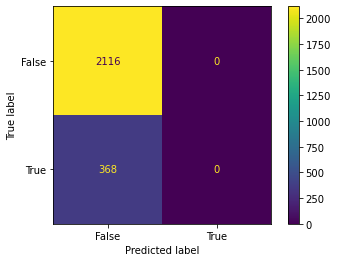

In [61]:
plot_confusion_matrix(estimator=dummy, X=X_train, y_true=y_train);

## Logistic Regression

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
logreg_baseline = LogisticRegression(random_state=42)
logreg_baseline.fit(X_train_scaled, y_train)
np.mean(cross_val_score(estimator=logreg_baseline, X=X_train_scaled, y=y_train))

0.8530586746284156

In [72]:
y_log_pred = logreg_baseline.predict(X_train_scaled)

In [74]:
acc_log = accuracy_score(y_train, y_log_pred)
acc_log

0.8683574879227053

In [75]:
recall_log = recall_score(y_train, y_log_pred)
recall_log

0.2717391304347826

In [76]:
prec_log = precision_score(y_train, y_log_pred)
prec_log

0.6289308176100629

In [78]:
f1_log = f1_score(y_train, y_log_pred)
f1_log

0.37950664136622386

## GridSearch 

In [132]:
grid = {'penalty':['l1','l2'],
        'class_weight':['balanced',{0:0.3, 1:0.7},{0:0.2, 1:0.8}],
        'solver':['lbfgs','saga'],
        'max_iter':[100,500,1000],
        'C':[0.1,1,10]}
logreg = LogisticRegression()

logreg_gs = GridSearchCV(estimator=logreg, param_grid=grid, cv=5, scoring='recall')
logreg_gs.fit(X_train_scaled, y_train)


C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\

C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_mod

C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear

C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\

C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
  

C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_

C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10],
                         'class_weight': ['balanced', {0: 0.3, 1: 0.7},
                                          {0: 0.2, 1: 0.8}],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'saga']},
             scoring='recall')

In [133]:
logreg_gs.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'saga'}

In [134]:
logreg_gs.best_score_

0.7061458718992967

In [135]:
pd.DataFrame(logreg_gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000967,0.000245,0.000000,0.000000,0.1,balanced,100,l1,lbfgs,"{'C': 0.1, 'class_weight': 'balanced', 'max_it...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,108
1,0.174721,0.100436,0.001536,0.000414,0.1,balanced,100,l1,saga,"{'C': 0.1, 'class_weight': 'balanced', 'max_it...",0.643836,0.756757,0.675676,0.824324,0.630137,0.706146,0.073642,1
2,0.024534,0.007734,0.001383,0.000768,0.1,balanced,100,l2,lbfgs,"{'C': 0.1, 'class_weight': 'balanced', 'max_it...",0.657534,0.702703,0.662162,0.810811,0.643836,0.695409,0.060943,19
3,0.224519,0.042254,0.002988,0.000713,0.1,balanced,100,l2,saga,"{'C': 0.1, 'class_weight': 'balanced', 'max_it...",0.657534,0.702703,0.662162,0.810811,0.643836,0.695409,0.060943,19
4,0.000105,0.000209,0.000000,0.000000,0.1,balanced,500,l1,lbfgs,"{'C': 0.1, 'class_weight': 'balanced', 'max_it...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1.121476,0.124886,0.001804,0.000443,10,"{0: 0.2, 1: 0.8}",500,l2,saga,"{'C': 10, 'class_weight': {0: 0.2, 1: 0.8}, 'm...",0.547945,0.635135,0.567568,0.635135,0.575342,0.592225,0.036156,31
104,0.000603,0.000492,0.000000,0.000000,10,"{0: 0.2, 1: 0.8}",1000,l1,lbfgs,"{'C': 10, 'class_weight': {0: 0.2, 1: 0.8}, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,88
105,1.921760,0.391505,0.002018,0.000506,10,"{0: 0.2, 1: 0.8}",1000,l1,saga,"{'C': 10, 'class_weight': {0: 0.2, 1: 0.8}, 'm...",0.547945,0.635135,0.567568,0.635135,0.575342,0.592225,0.036156,31
106,0.028017,0.005845,0.001075,0.000739,10,"{0: 0.2, 1: 0.8}",1000,l2,lbfgs,"{'C': 10, 'class_weight': {0: 0.2, 1: 0.8}, 'm...",0.561644,0.635135,0.567568,0.635135,0.575342,0.594965,0.033085,28


In [141]:
logreg_params = logreg_gs.best_estimator_

In [142]:
logreg_params.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='saga')

In [145]:
print(cross_val_score(estimator=logreg_params, X=X_train_scaled, y=y_train, cv=5, scoring='recall'))


C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[0.64383562 0.75675676 0.67567568 0.82432432 0.63013699]


C:\Users\YueYu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


## Decision Tree

In [ ]:
dc_baseline = DecisionTreeClassifier()
